## Bank Marketing Data Set

### Dataset from UCI Machine Learning Depository
### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Characteristics:  

### Multivariate


### Data Set Information:

### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


### Attribute Information:

### Input variables:
### bank client data:
### 1 - age (numeric)
### 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
### 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
### 5 - default: has credit in default? (categorical: 'no','yes','unknown')
### 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
### 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
### 8 - contact: contact communication type (categorical: 'cellular','telephone')
### 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
### 10 - day: last contact day 
### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### 12- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
### 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
### 14 - previous: number of contacts performed before this campaign and for this client (numeric)
### 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### 16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Our target is to research the determinants of the outcome: yes or no, based on the variables at hand; both the direct and the indirect.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv',sep=';')

In [3]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
720,48,entrepreneur,married,tertiary,no,810,no,no,unknown,6,jun,383,1,-1,0,unknown,no
358,48,admin.,divorced,secondary,no,4099,no,no,cellular,2,apr,397,2,-1,0,unknown,yes
1529,29,management,single,secondary,no,417,no,no,cellular,7,oct,90,1,-1,0,unknown,no
2560,44,blue-collar,married,secondary,no,1071,yes,no,cellular,11,may,143,3,357,1,failure,no
1959,44,blue-collar,married,secondary,no,2523,yes,no,unknown,29,may,1236,2,-1,0,unknown,no
1324,41,entrepreneur,married,tertiary,no,171,yes,no,cellular,19,nov,209,1,191,4,failure,no
872,33,technician,single,secondary,no,716,yes,no,cellular,14,may,234,2,-1,0,unknown,no
2257,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
1229,27,blue-collar,single,primary,no,-79,yes,no,unknown,30,may,385,5,-1,0,unknown,no
2075,69,retired,married,tertiary,no,473,no,no,cellular,7,jul,112,1,78,1,failure,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(4521, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

####  We entered the data and opened the dataset. It has 4521 rows and 17 columns. There are no nan values. The columns are either numeric or objects.

####  Next we search the correlations between numeric variables, in a correlation table,at first, and then in a graph. This search can be usefull as we search for variables determining the final outcome. Most variables are uncorrelated, except 'pdays' and 'previous' which do have a meaningfull correlation around 0.58, which is reasonable, given both variables refer to the previous campaign(number of days passed vs number of contancts)

In [8]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


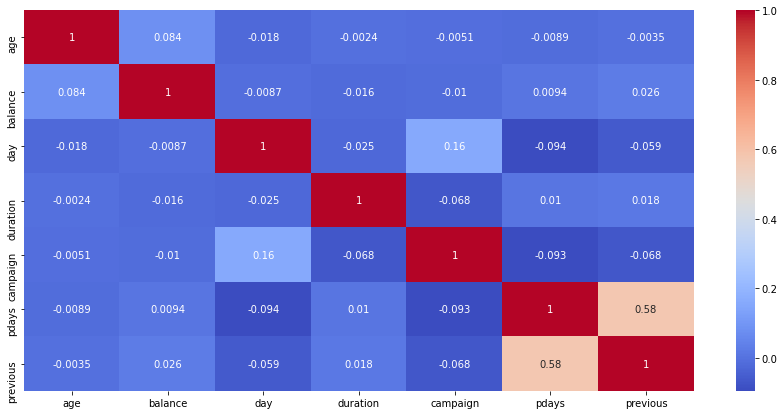

In [153]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

#### Then we turn all object variables to categoricals, because this is what they are: categories, so we can analyse them better. Also, we take 2 describe tables, one for numeric variables and one for categorical.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [11]:
lst=[ 'job', 'marital', 'education', 'default', 'housing',
       'loan',  'month',  'poutcome', 'y']
for i in lst:
    df[i]=df[i].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   object  
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(9), int64(7), object(1)
memory usage: 324.1+ KB


In [13]:
df.describe(include='category').T

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
y,4521,2,no,4000


In [14]:
df['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 222       1
 210       1
 206       1
 162       1
 28        1
Name: pdays, Length: 292, dtype: int64

In [15]:
df['pdays'].unique()

array([ -1, 339, 330, 176, 147, 241, 152, 105, 342, 101,   5,  92,  56,
       170, 182, 297, 196, 460, 137, 367, 145, 169, 207, 266, 288, 168,
       345, 436,  90, 183, 146, 335, 347, 119,   7, 271, 181,  88, 141,
       126,  61, 373, 351, 242,  62,  91, 308, 250, 172, 265,  78,  28,
        79,   1, 188, 167,  89, 164, 462, 209, 321, 254,  94, 364,  96,
       356, 149, 363, 275, 325, 341, 260, 358,  87, 303,  98, 327, 337,
       322, 102,  99, 370,  84, 212,  63,  81, 191, 360, 332,  80,  85,
       247, 150, 175, 382, 261, 336,  58, 206, 112, 199, 133, 208, 253,
       135, 278, 140, 298, 273, 124, 281, 162, 323, 349, 117,   2, 256,
       333, 116, 268, 136, 198, 357, 259, 353, 174, 371, 205, 246,  69,
       315, 110, 461, 184, 270, 127, 187,  64, 130, 346, 100, 352, 808,
       113, 378, 292, 287, 107, 293, 139, 138, 193, 274,  97, 103, 359,
       185, 674, 211, 300, 334, 280, 479,  95, 262, 362, 225,   3, 366,
        60, 190, 368, 122, 343, 131, 365, 299, 115, 316, 180, 15

In [16]:
df[df['pdays']==-1].tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


In [17]:
df[(df['pdays']==-1)& (df['poutcome']=='success')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### We see in the numeric describe table, that many variables have very high standard deviation, so, they have high variance and moreover, they have also extreme values to the right (highly skewed). We see also that pdays has a value -1, which does not make sense. Then in the categorical table, we see how many values each category has , which is the most popular in each column. Then we go on and research the -1 value in pdays , which as we see is the value of customers contacted for the first time in this campaign, as they all have 0 value in the previous column. Although the data description said it would have 999 value, it would make the distribution very skewed as it has the most values(so, the bank became probably more aggressive or they want to expand to new area of customers of products).

#### Then we start the exploration of the distributions of numeric variables, which as expected, we see they are highly skewed

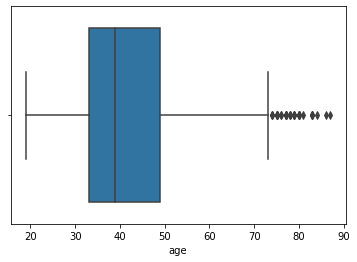

In [18]:
sns.boxplot(df['age']);

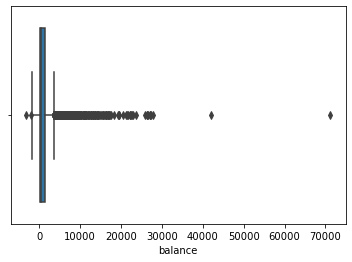

In [19]:
sns.boxplot(df['balance']);

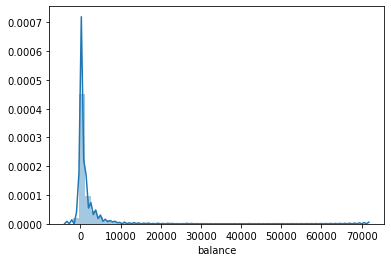

In [20]:
sns.distplot(df['balance']);

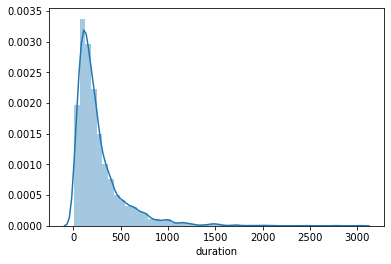

In [21]:
sns.distplot(df['duration']);

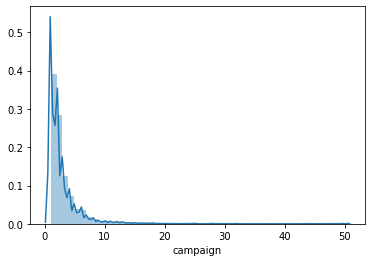

In [22]:
sns.distplot(df['campaign']);

C:\Users\vasia\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


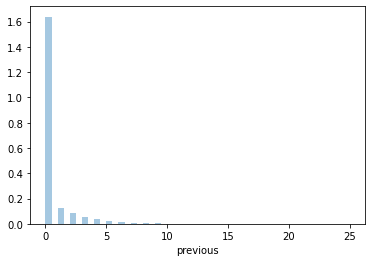

In [23]:
sns.distplot(df['previous']);

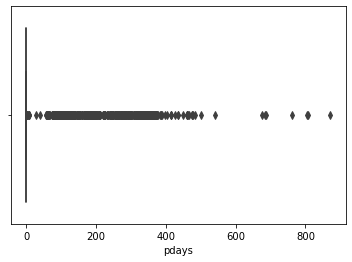

In [24]:
sns.boxplot(df['pdays']);

#### Then we see some countplots, to have a sense of the order of values within the variables. We see among others that 'yes' is 1/9 and that most have good jobs ,cellular is the most popular contact, most have no loans and months distribution is very uneven.

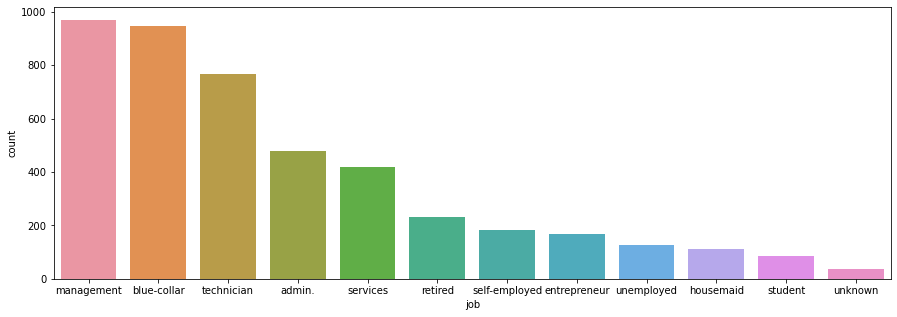

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(df['job'], order = df['job'].value_counts().index);

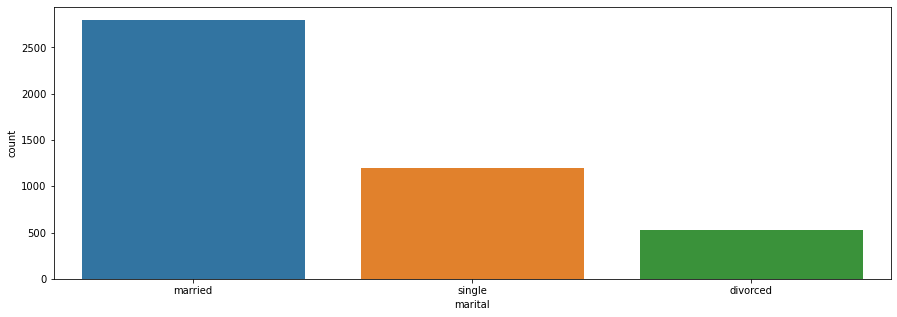

In [26]:
plt.figure(figsize=(15, 5))
sns.countplot(df['marital'],order=df['marital'].value_counts().index);

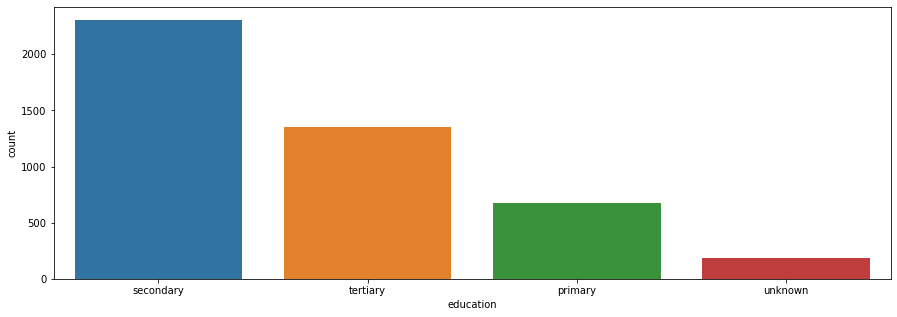

In [27]:
plt.figure(figsize=(15, 5))
sns.countplot(df['education'],order=df['education'].value_counts().index);

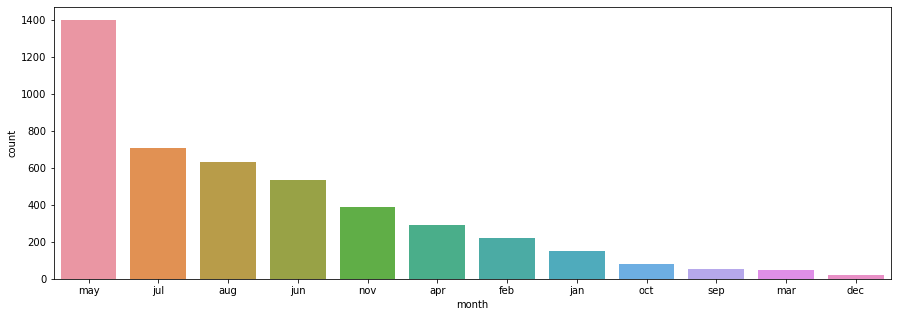

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(df['month'],order=df['month'].value_counts().index);

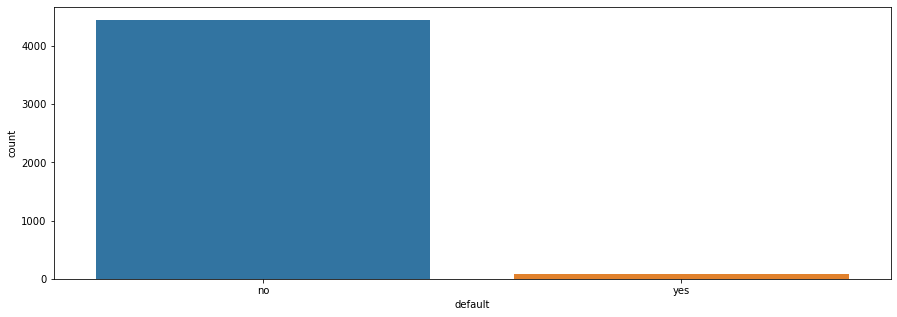

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(df['default']);

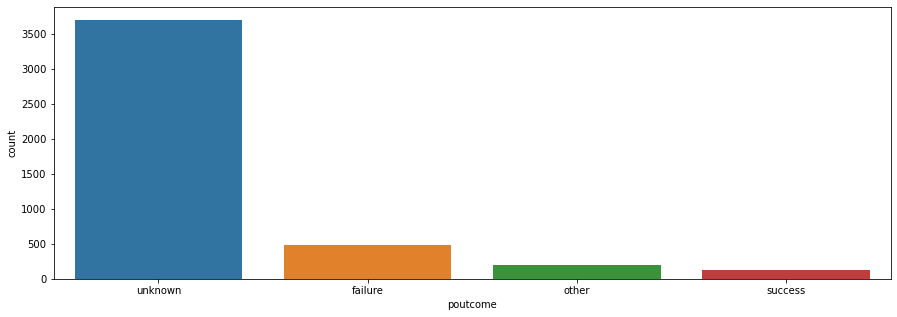

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(df['poutcome'],order=df['poutcome'].value_counts().index);

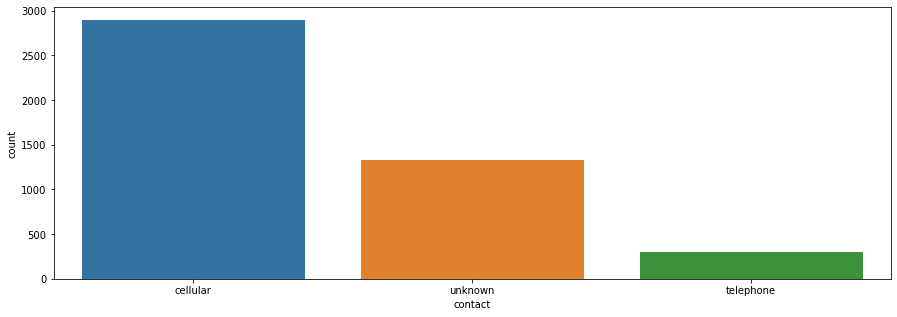

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(df['contact']);

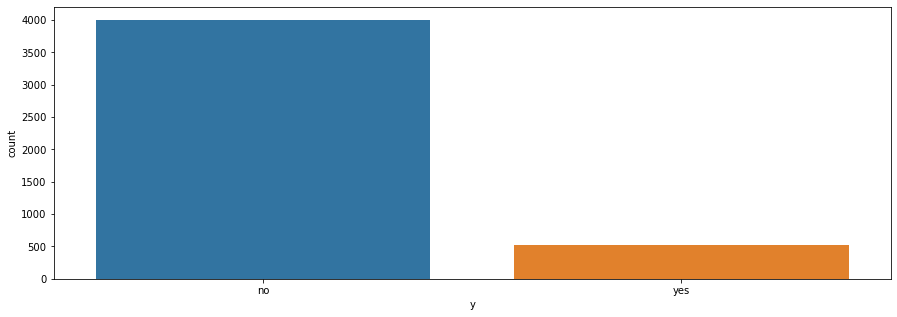

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(df['y']);

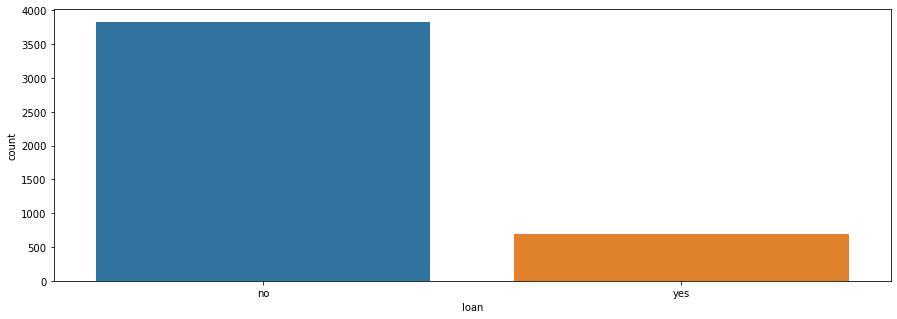

In [33]:
plt.figure(figsize=(15, 5))
sns.countplot(df['loan']);

#### We then make an unusual turn and instead of analysing variables by two, we analyse them together  against the outcome (targeted variable) and through this correlogram, we find their importances, prositive and negative, first for the whole set . As we see most positive: duration, successful outcome of previous campaign, cellular contact, previous contact and days from that, no housing.

In [34]:
df_corr2 = (pd.get_dummies(df,columns=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'campaign', 'poutcome', 'y'])).corr()

In [35]:
corr_yes=df_corr2['y_yes'].sort_values().iloc[1:-1]

In [36]:
corr_yes.sort_values(ascending=False)

duration            0.401118
poutcome_success    0.283481
month_oct           0.145964
contact_cellular    0.118761
previous            0.116714
                      ...   
loan_yes           -0.070517
month_may          -0.102077
housing_yes        -0.104683
contact_unknown    -0.139399
poutcome_unknown   -0.162038
Name: y_yes, Length: 82, dtype: float64

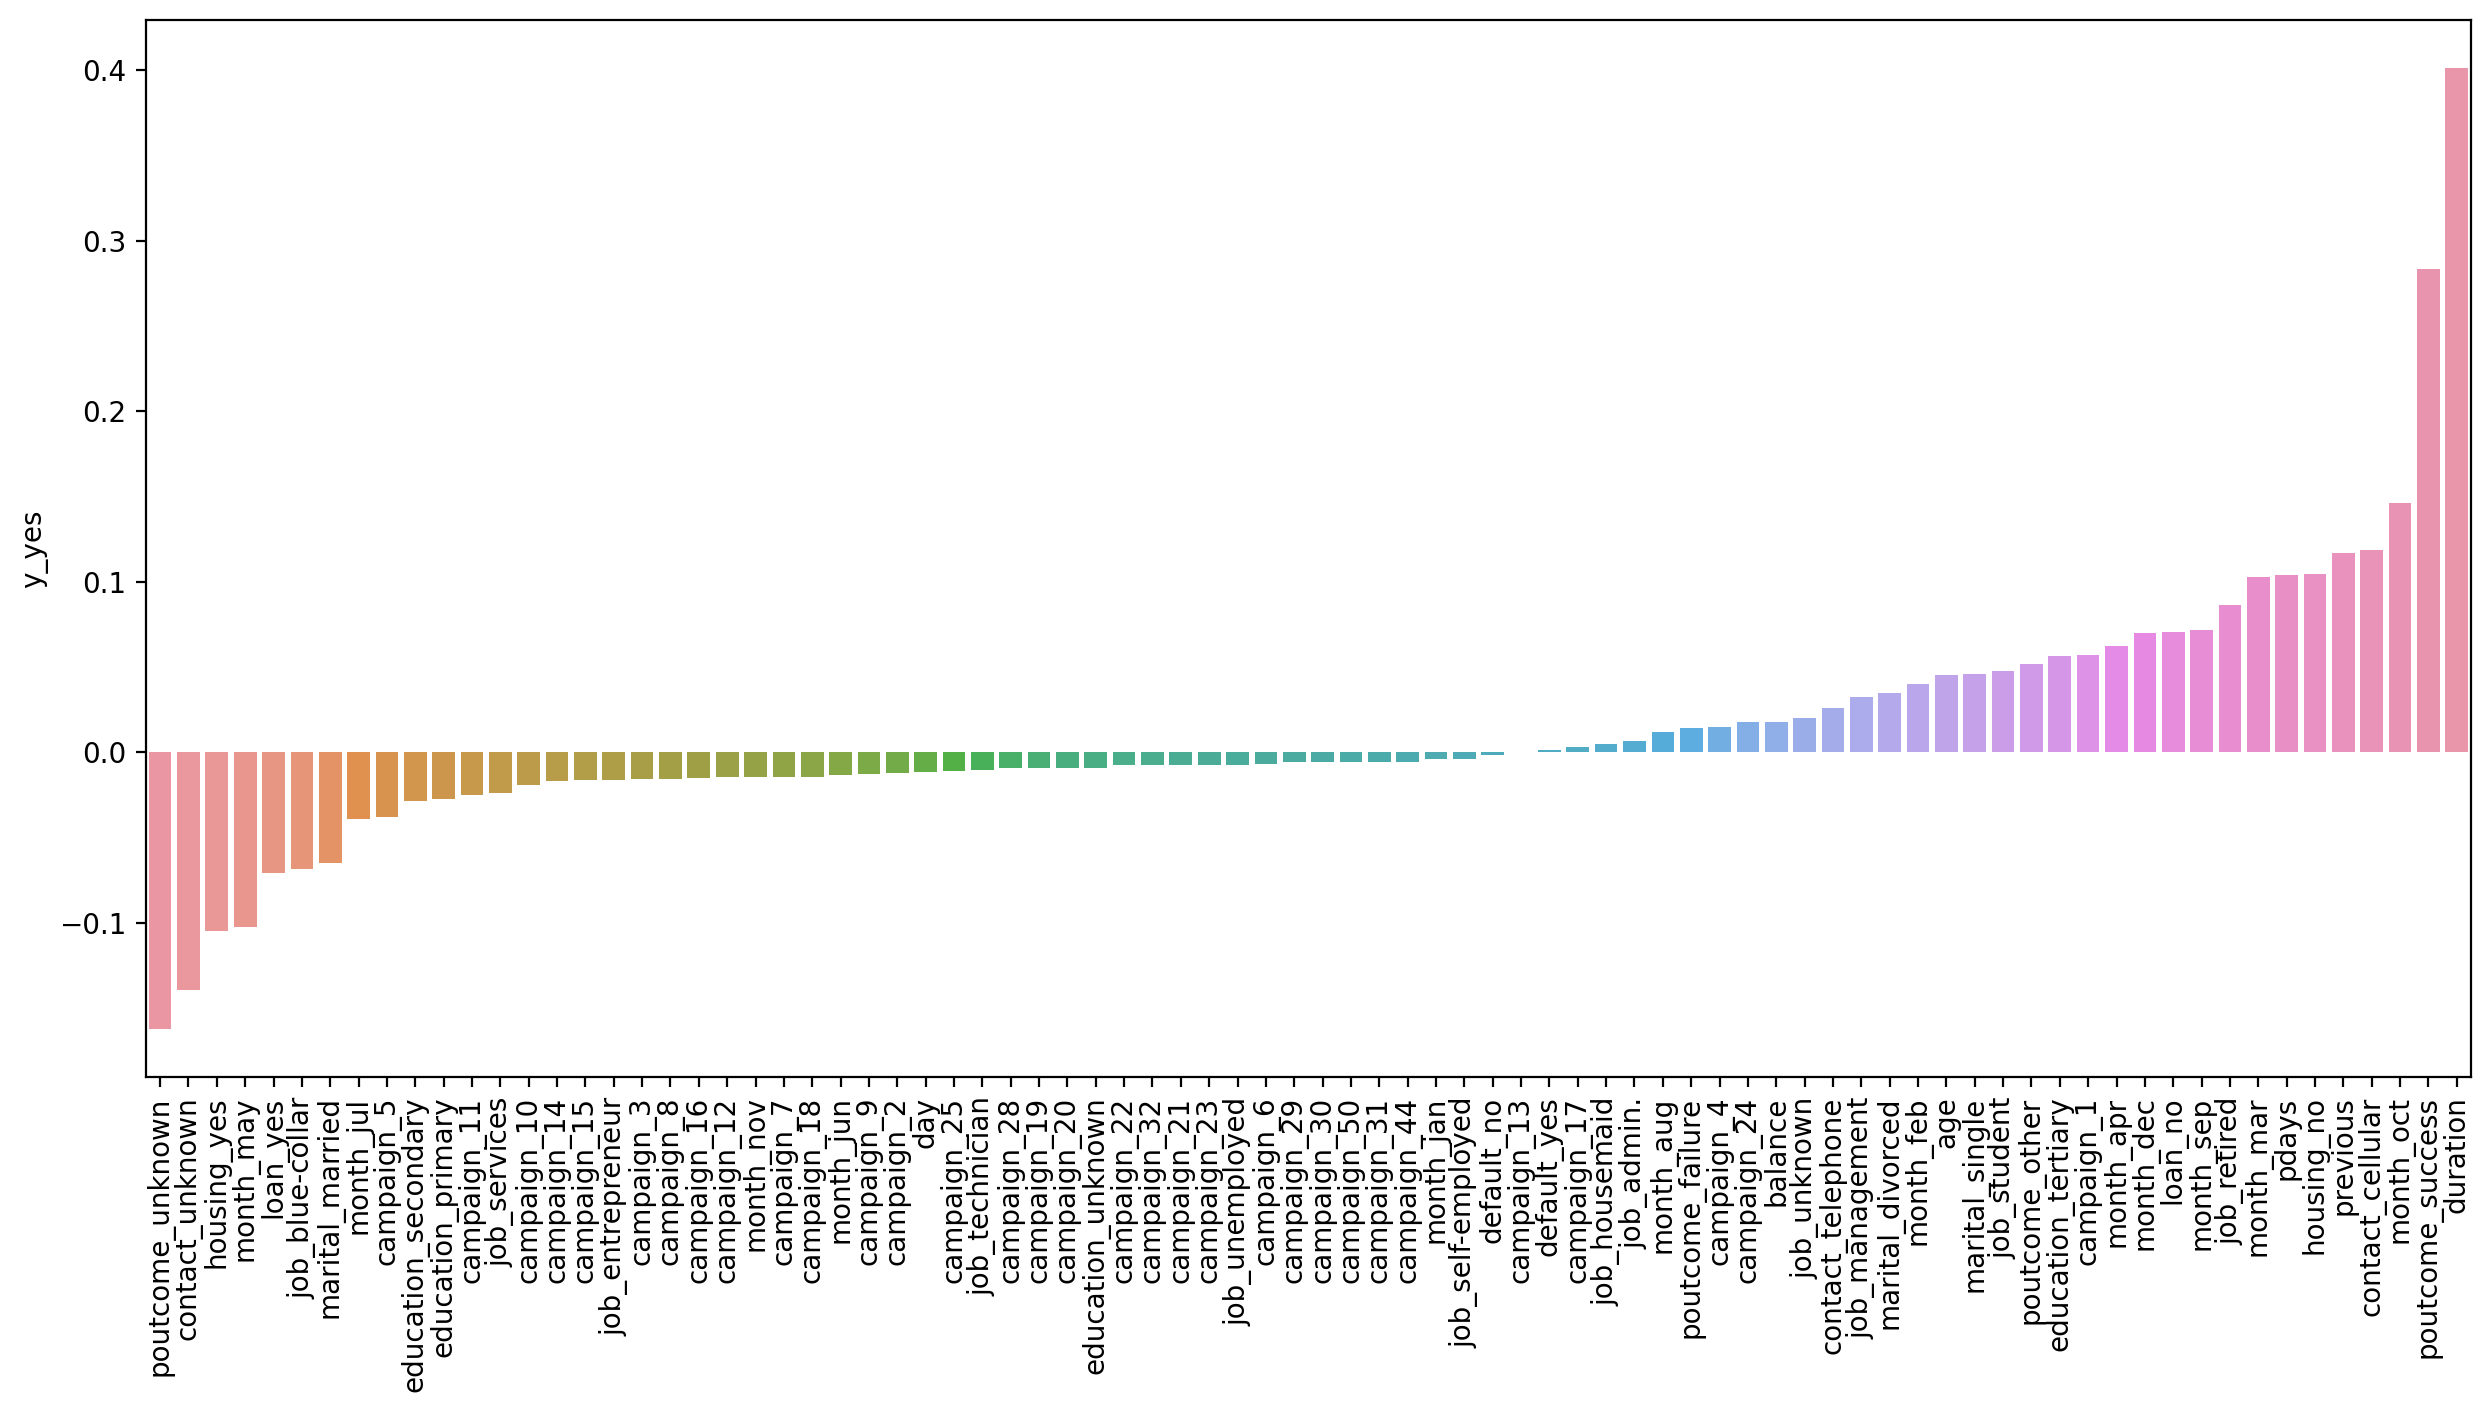

In [152]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(x=corr_yes.index,y=corr_yes)
plt.xticks(rotation=90);

#### Then we examine the importances for the first contacted customers. Most important positive are duration, cellular contact, retired as job, no housing, no loan, single, tetartiary education in this order, plus some months as October, March and April which we do not know why are more preferable than others.

In [158]:
df2=df[(df['pdays']==-1)]

In [ ]:
df2.drop(['previous'],axis=1,inplace=True)

In [40]:
df2.drop(['poutcome'],axis=1,inplace=True)

In [41]:
df_corr3 = (pd.get_dummies(df2,columns=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'campaign','y'])).corr()

In [42]:
corr_yes1=df_corr3['y_yes'].sort_values().iloc[1:-2]

In [43]:
corr_yes1.sort_values(ascending=False)

duration            0.434361
month_oct           0.123501
month_mar           0.107369
contact_cellular    0.103155
job_retired         0.093779
                      ...   
loan_yes           -0.061091
marital_married    -0.076776
housing_yes        -0.080828
month_may          -0.084133
contact_unknown    -0.118580
Name: y_yes, Length: 76, dtype: float64

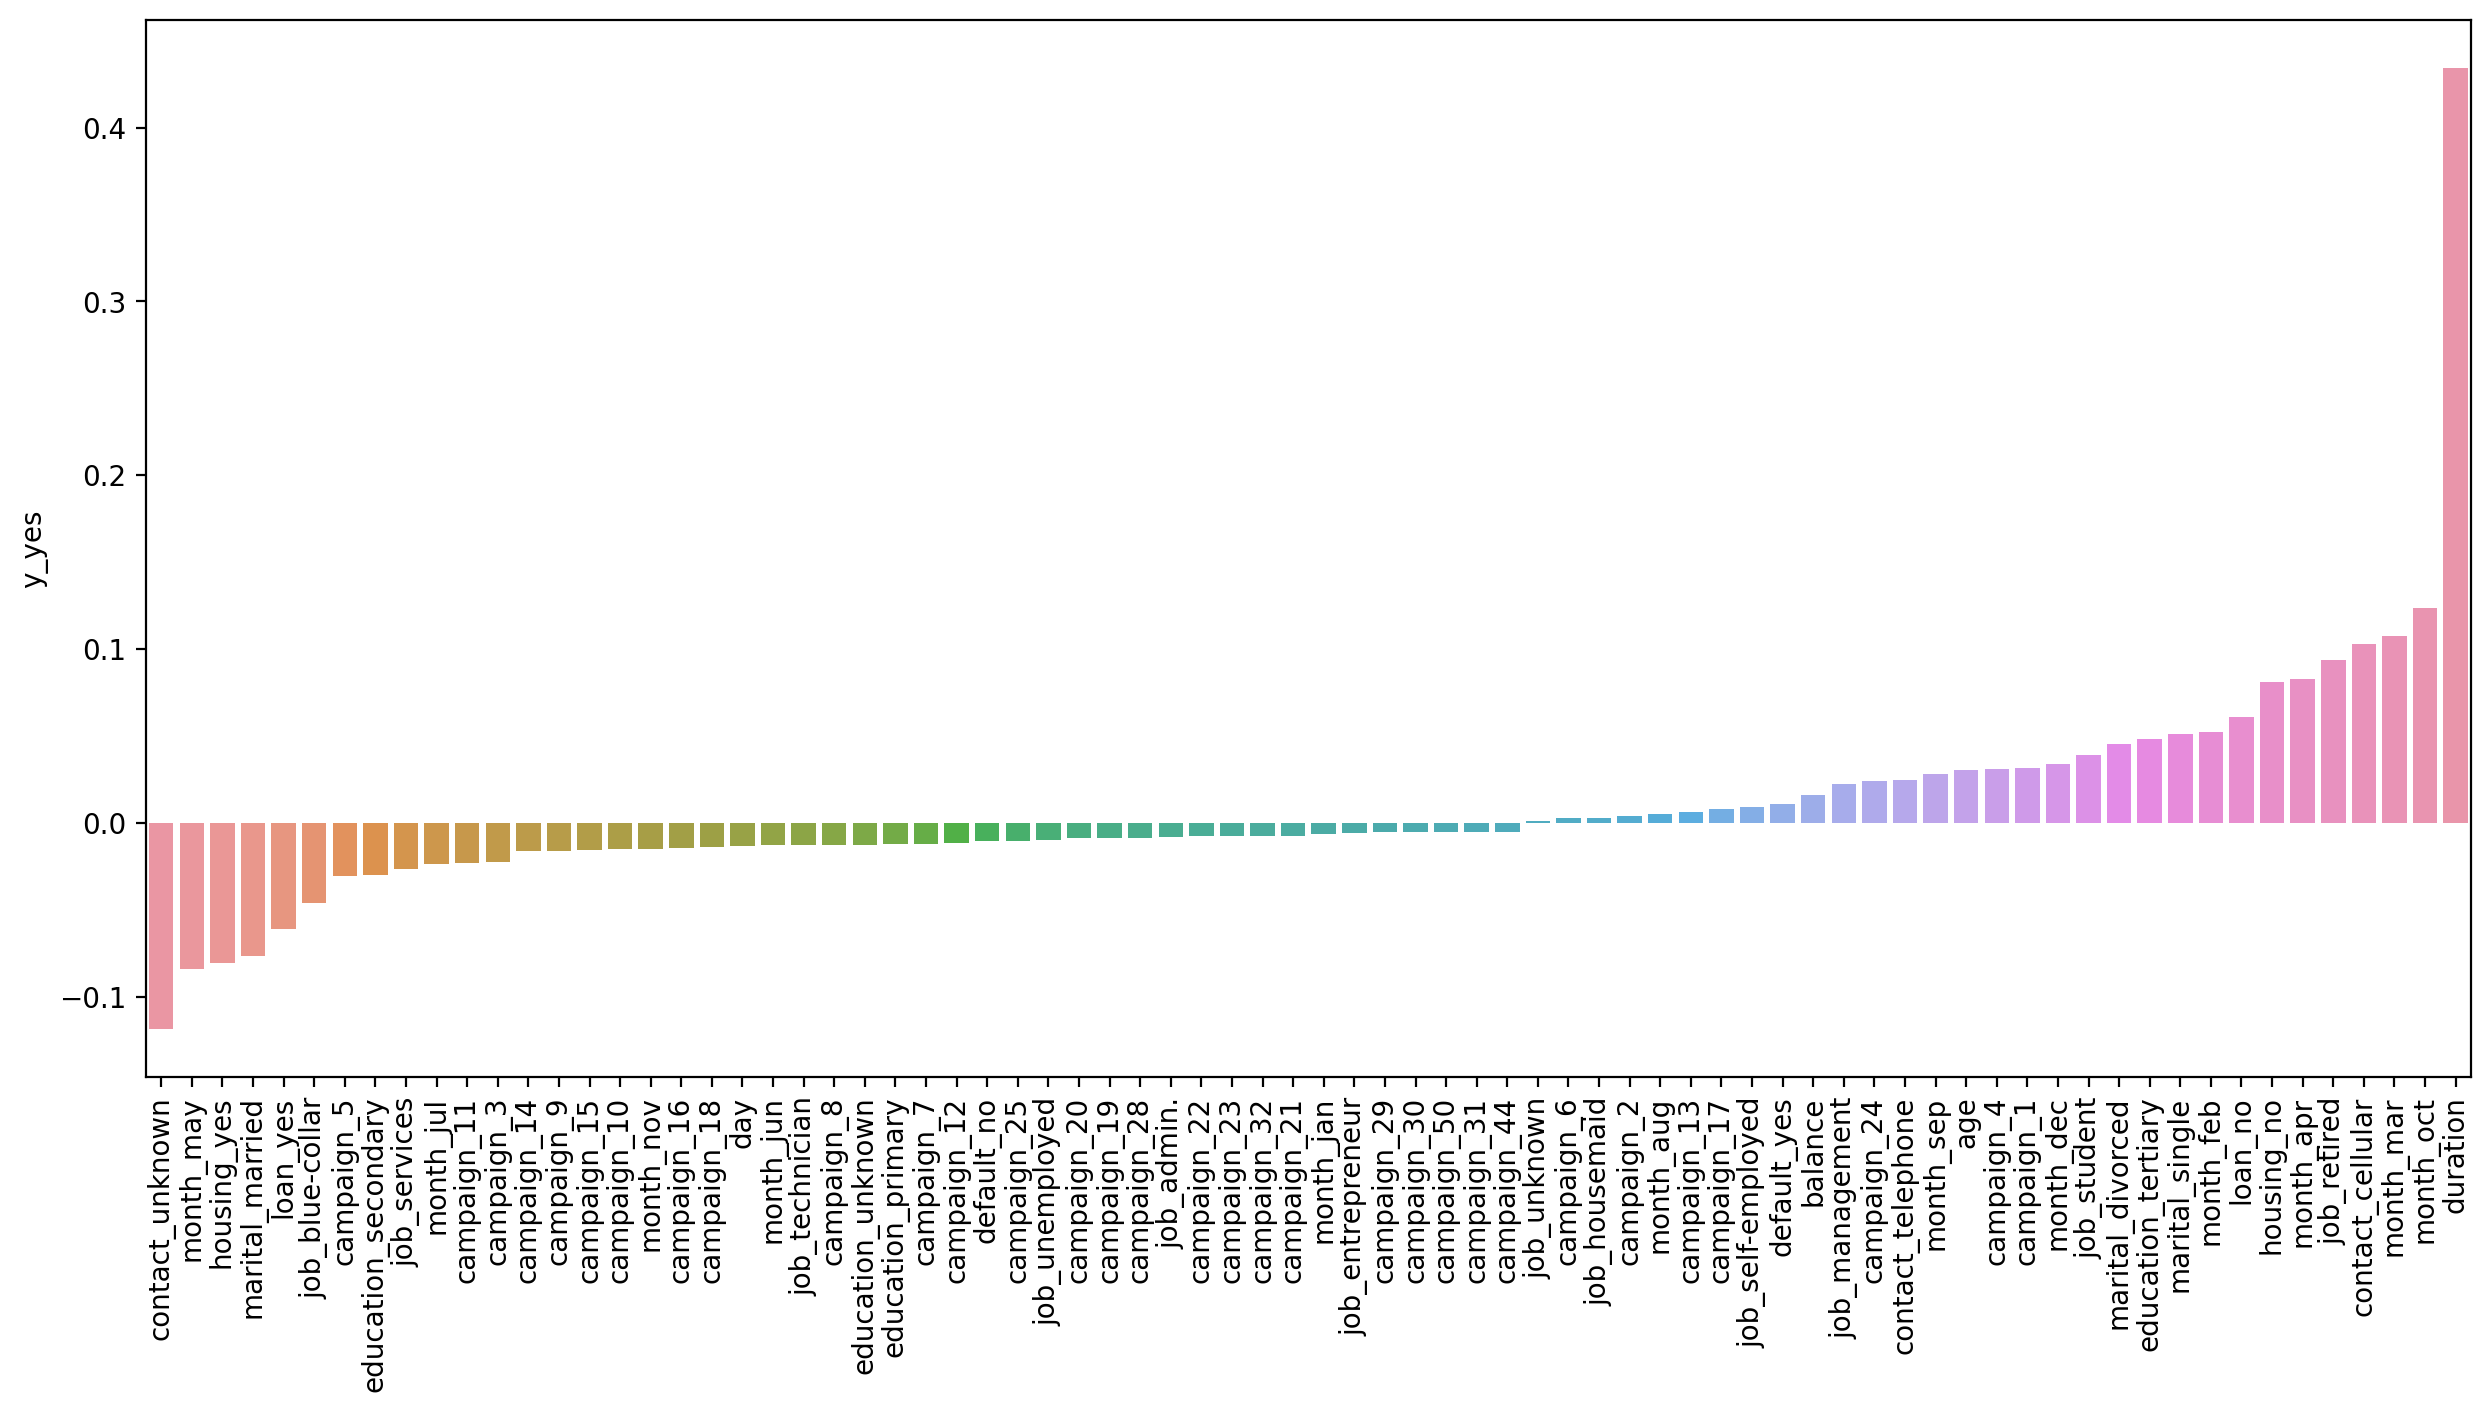

In [151]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(x=corr_yes1.index,y=corr_yes1)
plt.xticks(rotation=90);

#### Then we go on and use a function to calculate the  relative percentages in graphs. We see that 11,5% of all contacted customers accepted the offer and 9,1% of the first contacted customers.

In [45]:
def perce(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

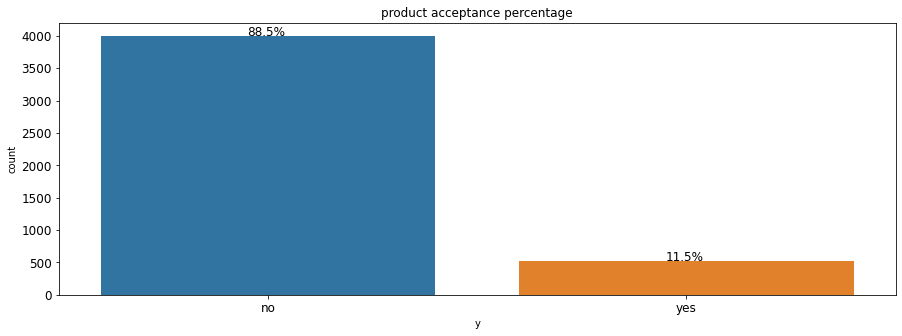

In [150]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df)
plt.xticks(size=12)  
plt.yticks(size=12)
plt.title('product acceptance percentage')
perce(ax,df['y']);                 

In [47]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

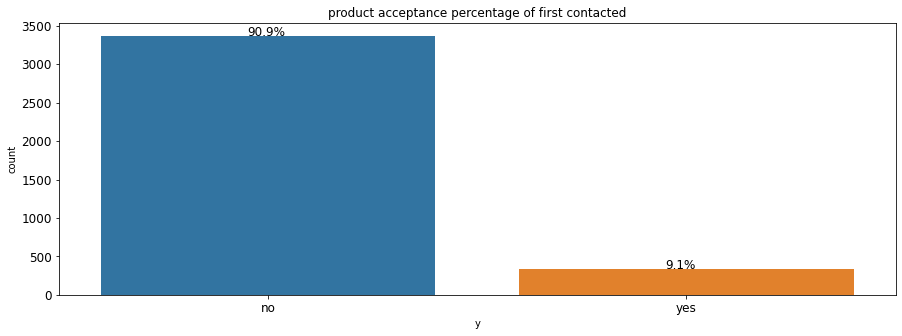

In [149]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df2)
plt.xticks(size=12)  
plt.yticks(size=12)
plt.title('product acceptance percentage of first contacted')
perce(ax,df2['y']);  

#### Then we go on and explore a few percentages based on accepting the offer or not (hue)

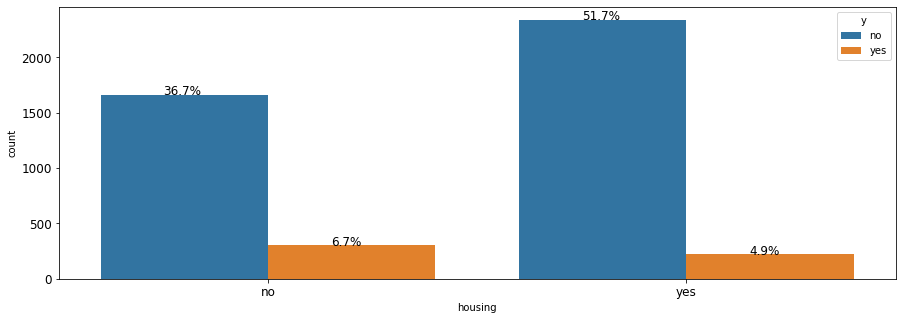

In [49]:
plt.figure(figsize=(15,5))
ax=sns.countplot('housing',hue='y',data=df)
plt.xticks(size=12)  
plt.yticks(size=12)                      
perce(ax,df['housing'])    

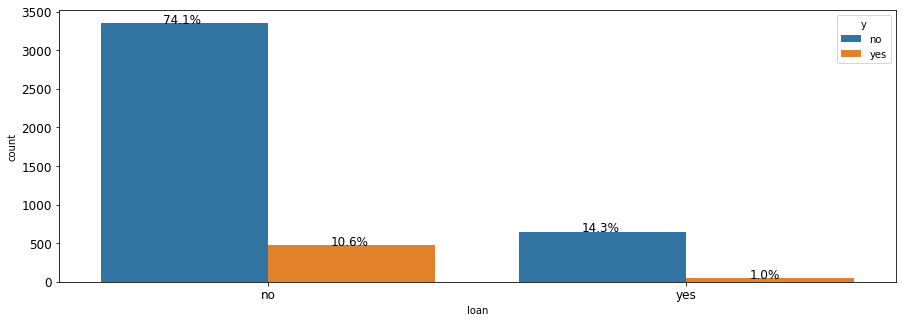

In [50]:
plt.figure(figsize=(15,5))
ax=sns.countplot('loan',hue='y',data=df)
plt.xticks(size=12)  
plt.yticks(size=12)                      
perce(ax,df['loan'])    

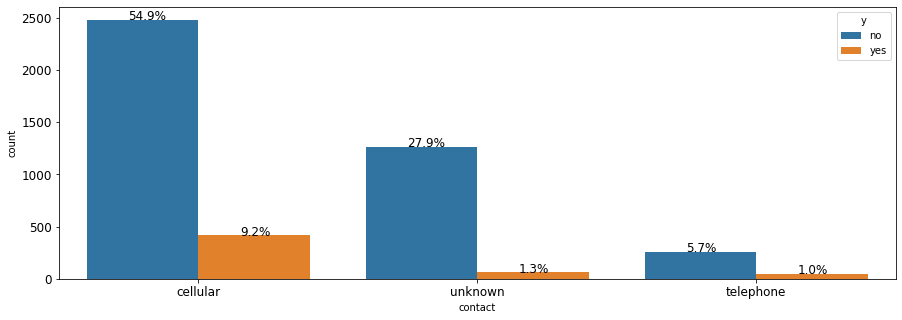

In [51]:
plt.figure(figsize=(15,5))
ax=sns.countplot('contact',hue='y',data=df)
plt.xticks(size=12)  
plt.yticks(size=12)                      
perce(ax,df['contact'])  

#### Here we see that for people over 70, the acceptance rate is far more probable, however there are not many people above 70 in this dataset.

In [52]:
df_old=df[df['age']>70]

In [53]:
df_old['y'].value_counts()

no     30
yes    24
Name: y, dtype: int64

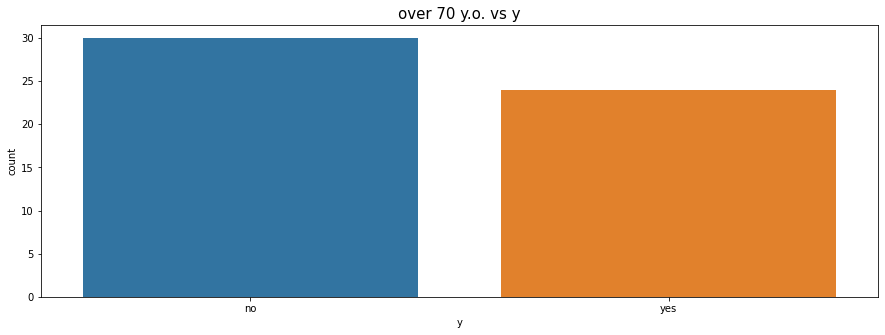

In [155]:
plt.figure(figsize=(15,5))
sns.countplot(df_old['y']);
plt.title('over 70 y.o. vs y',size=15);

#### Here we see the acceptance rate for customers with high duration and no loan is 40,5%.

In [55]:
df8=df[(df['loan']=='no') &(df['duration']>500)]

In [56]:
df8['y'].value_counts()

no     295
yes    201
Name: y, dtype: int64

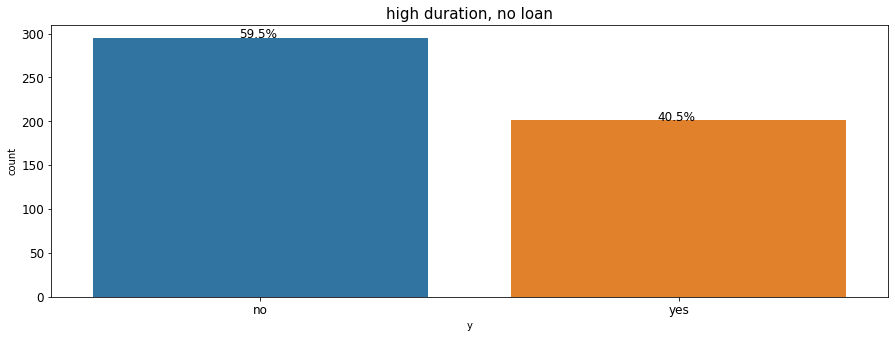

In [148]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df8)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('high duration, no loan',size=15)
perce(ax,df8['y']);  

#### We analyze the success rate based on variables that have high correlation. In this instance we examine previous outcome success and contact cellular and the results show an acceptance rate of nearly 64,9%.

In [58]:
df9=df[(df['contact']=='cellular') & (df['poutcome']=='success')]

In [59]:
df9['y'].value_counts()

yes    74
no     40
Name: y, dtype: int64

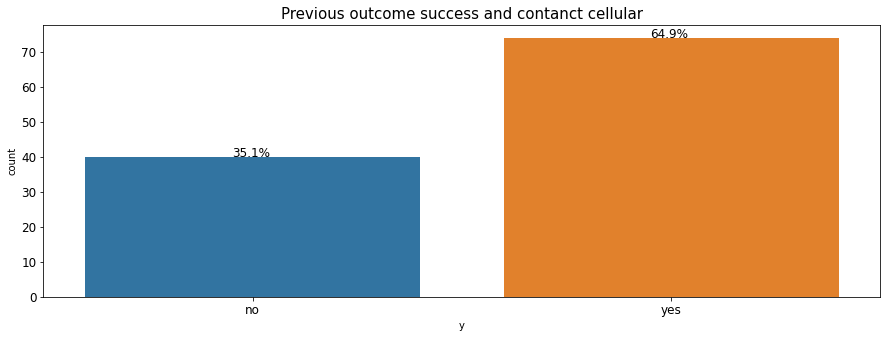

In [147]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df9)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('Previous outcome success and contanct cellular',size=15)
perce(ax,df9['y']);  

#### We then go on and see a few figures with three significant and positive variables combined. Below we see that a high duration, with previous success and no housing customer has more than 70% chance of accepting again the offer.

In [61]:
df3=df[(df['poutcome']=='success')&(df['duration']>400) & (df['housing']=='no')]

In [62]:
df3['y'].value_counts()

yes    15
no      6
Name: y, dtype: int64

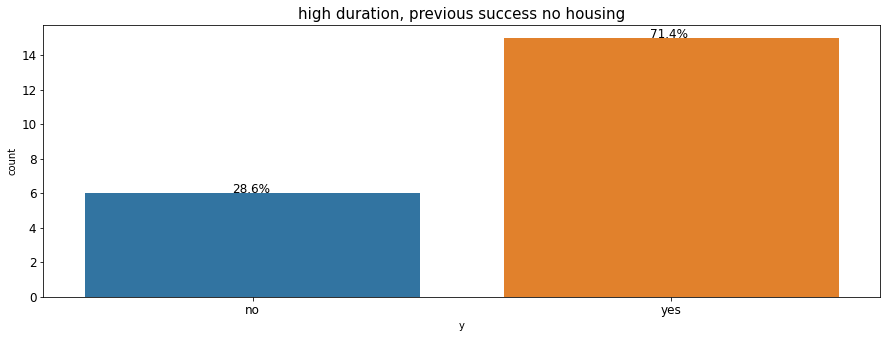

In [146]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df3)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('high duration, previous success no housing',size=15)
perce(ax,df3['y']); 

#### Here we see the acceptance ratio of another 3 significantly positive variables: high duration, retired, where acceptance rate is 50%.

In [64]:
df4=df[(df['duration']>400) & (df['loan']=='no') & (df['job']=='retired')]

In [65]:
df4['y'].value_counts()

yes    25
no     25
Name: y, dtype: int64

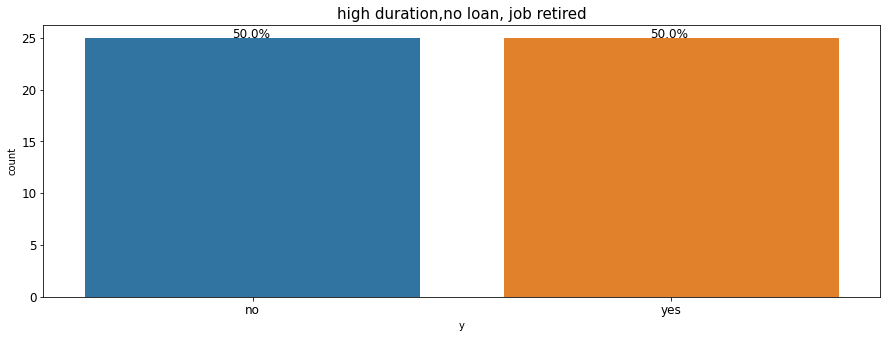

In [145]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df4)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('high duration,no loan, job retired',size=15)
perce(ax,df4['y']); 

#### Then we examine the acceptance rate of first time contacted, given high duration, no housing and cellular contact. The acceptance rate that we found is 38.4%

In [67]:
df6=df2[(df2['contact']=='cellular')&(df2['duration']>400) & (df2['housing']=='no')]

In [68]:
df6['y'].value_counts()

no     135
yes     84
Name: y, dtype: int64

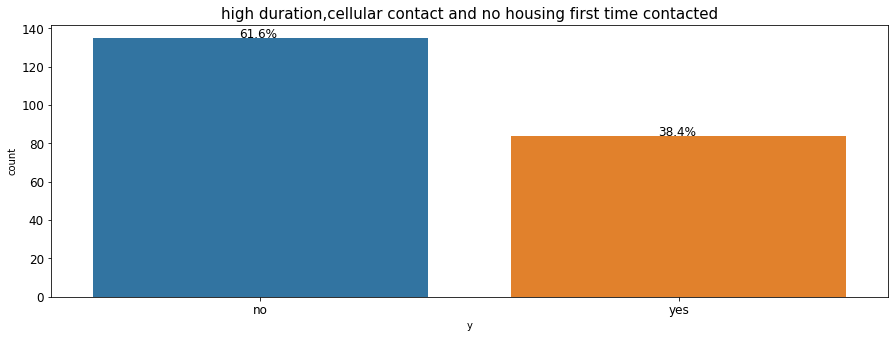

In [144]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df6)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('high duration,cellular contact and no housing first time contacted',size=15)
perce(ax,df6['y']); 

#### We then go on to examine similar variables but for the first time contacted. We find high duration, no loan and retired customers have a 42,9% acceptance rate.

In [70]:
df5=df2[(df2['duration']>400) & (df2['loan']=='no') & (df2['job']=='retired')]

In [71]:
df5['y'].value_counts()

no     20
yes    15
Name: y, dtype: int64

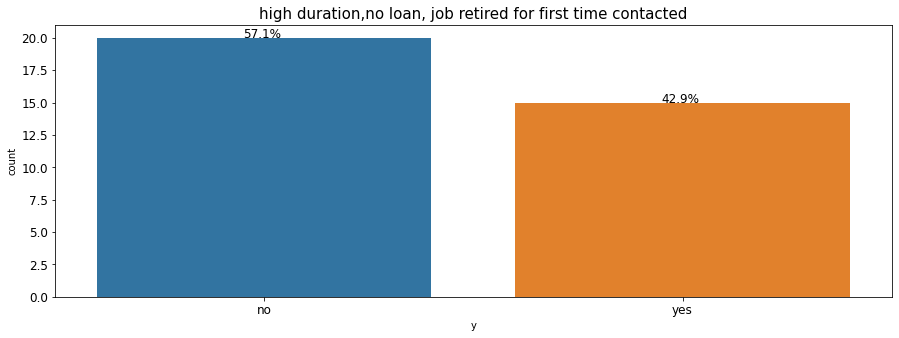

In [143]:
plt.figure(figsize=(15,5))
ax=sns.countplot('y',data=df5)
plt.xticks(size=12)  
plt.yticks(size=12)        
plt.title('high duration,no loan, job retired for first time contacted',size=15)
perce(ax,df5['y']); 

#### Then we try to give reason to uneven month correlation with answer to the product. We first examine  October, March and December which appear to have high positive correlation, and we see that not many observations are there for these months. So, then we take the column 'month' of the dataset and see how observations gone and we see that these months are the with the fewest observations. These have no obvious reason, but we see that the number of observations  have inverse relationship with the positive answer.

In [73]:
df_month=df[(df['month']=='oct')|(df['month']=='mar')|(df['month']=='dec')]

In [74]:
df_month['y'].value_counts()

no     82
yes    67
Name: y, dtype: int64

In [75]:
df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

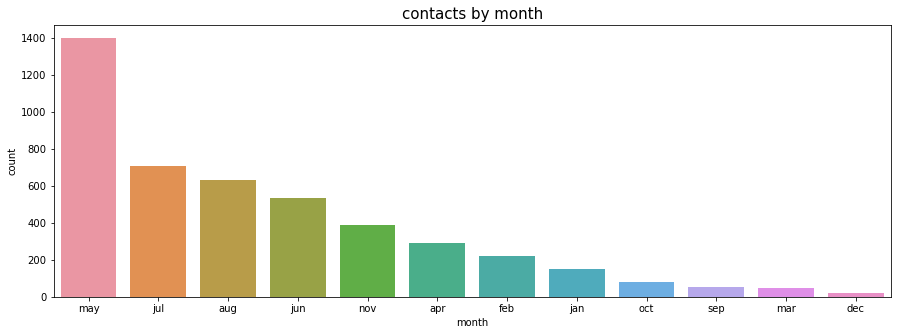

In [76]:
plt.figure(figsize=(15, 5))
sns.countplot(df['month'], order = df['month'].value_counts().index);
plt.title('contacts by month',size=15);

In [77]:
df_corr5 = (pd.get_dummies(df,columns=['month', 'y'])).corr()

In [78]:
df_corr6=df_corr5[['month_oct','month_mar','month_sep','month_dec','month_apr','month_feb','month_aug','month_jan','month_jun','month_nov','month_jul','month_may','y_yes','y_no']]

In [79]:
corr_yes6=df_corr6['y_yes'].sort_values().iloc[1:-1]

In [80]:
corr_7=corr_yes6[['month_oct','month_mar','month_sep','month_dec','month_apr','month_feb','month_aug','month_jan','month_jun','month_nov','month_jul','month_may']].sort_values(ascending=False)

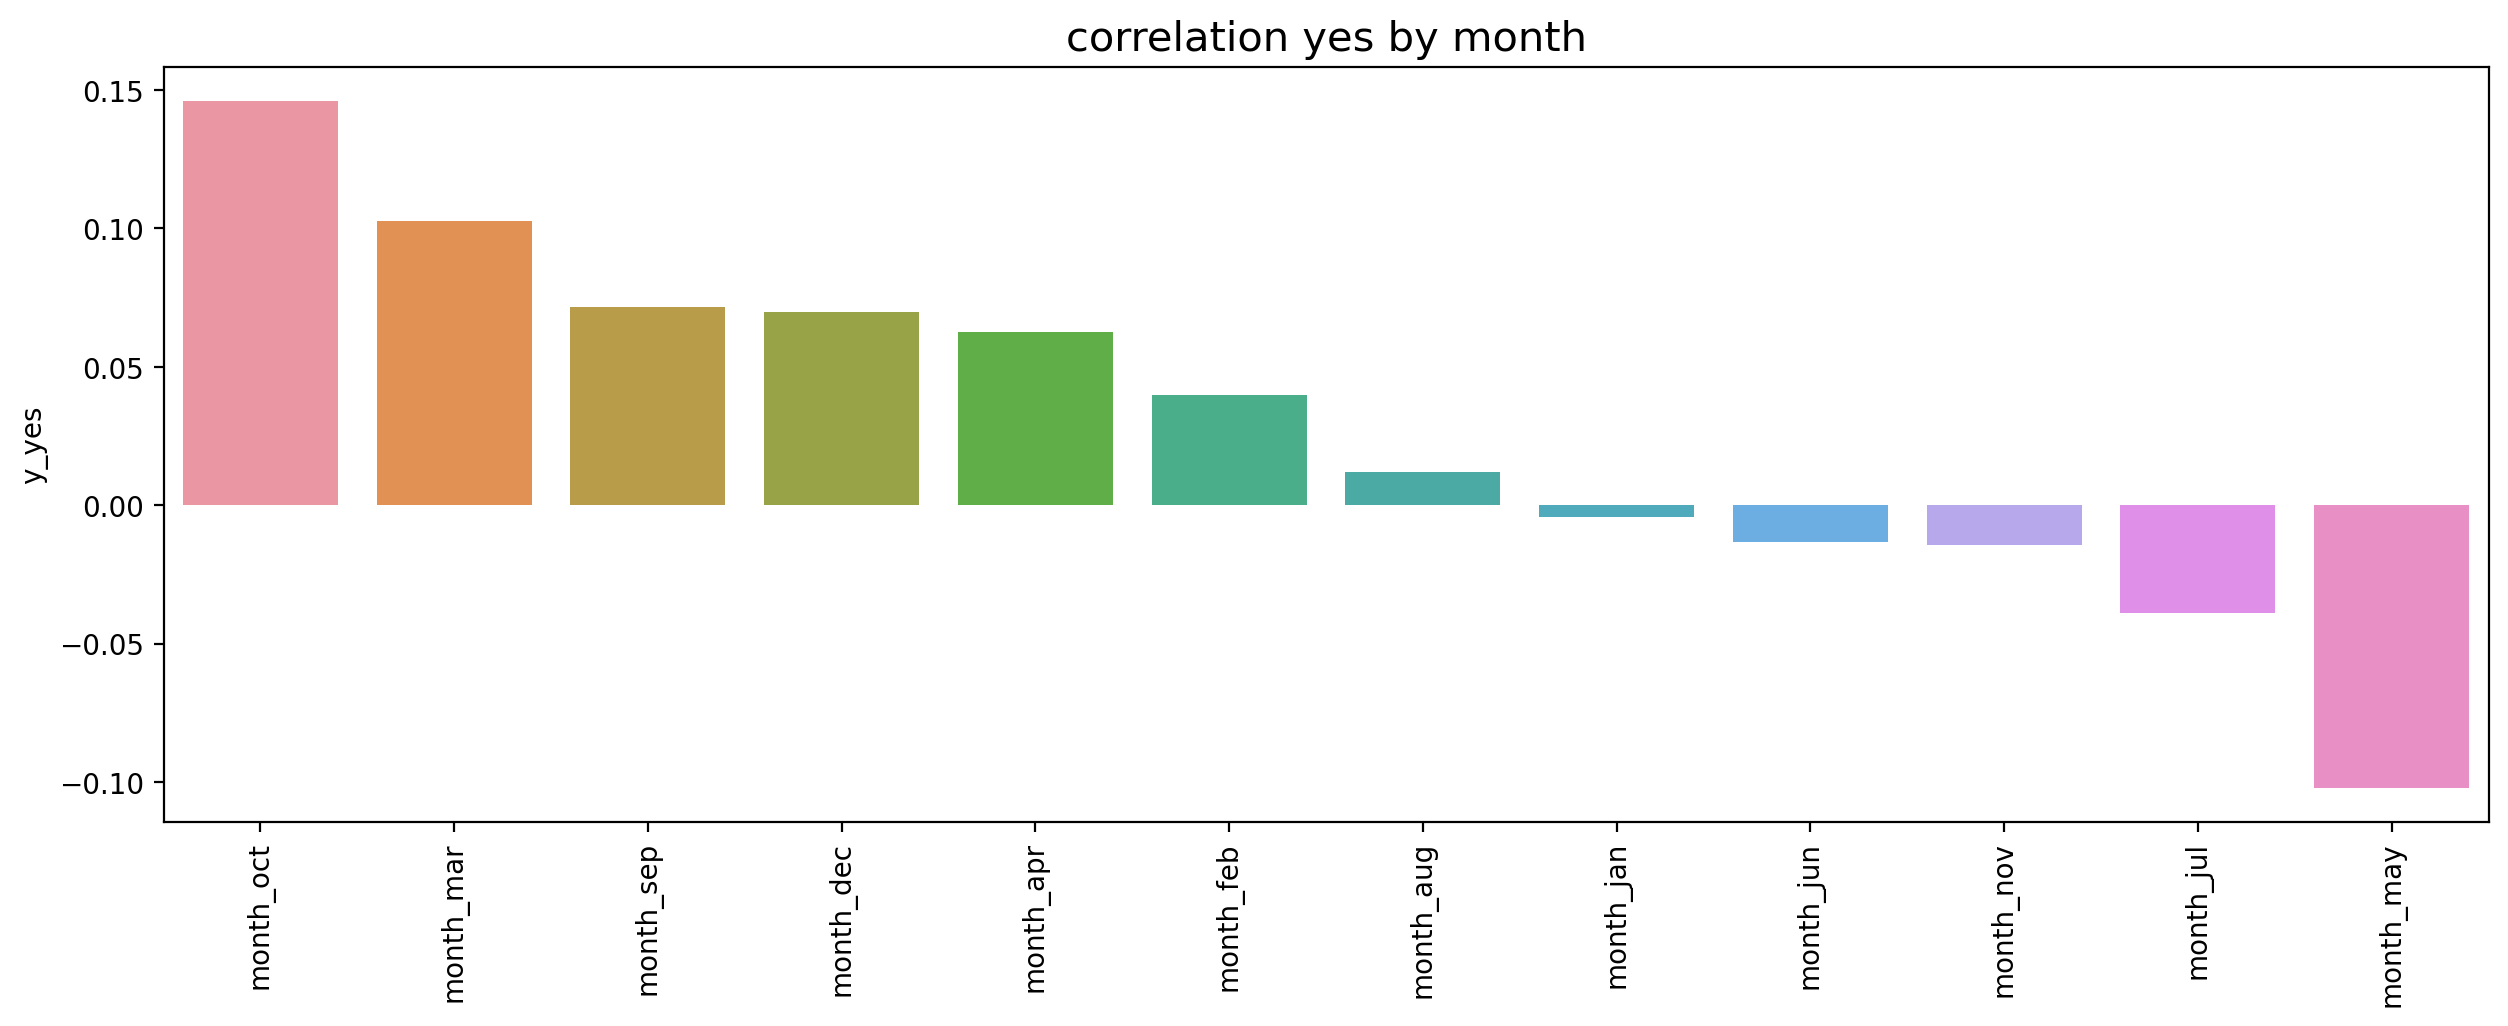

In [142]:
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(x=corr_7.index,y=corr_7)
plt.xticks(rotation=90);
plt.title('correlation yes by month',size=15);

#### Finally, we examine some other relationships between duration, month, age, job, etc

In [82]:
df_month.groupby('y')['duration'].mean()

y
no     209.731707
yes    338.955224
Name: duration, dtype: float64

In [83]:
df.groupby('y')['duration'].mean()

y
no     226.347500
yes    552.742802
Name: duration, dtype: float64

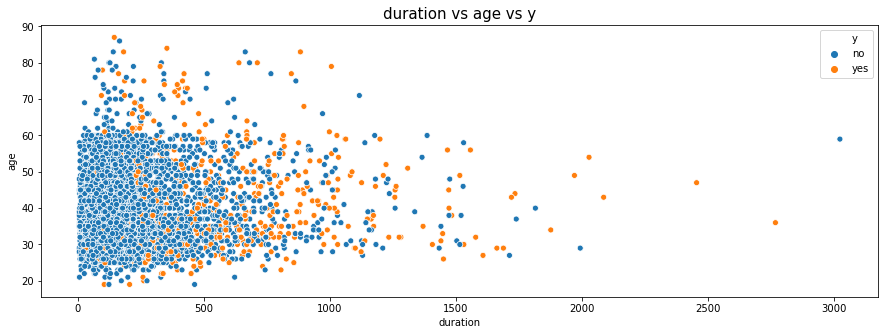

In [140]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['duration'],df['age'],hue=df['y']);
plt.title('duration vs age vs y',size=15);

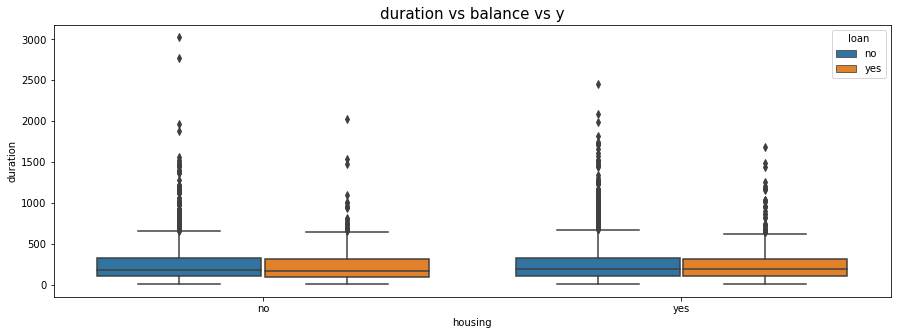

In [139]:
plt.figure(figsize=(15,5))
sns.boxplot(df['housing'],df['duration'],hue=df['loan']);
plt.title('duration vs balance vs y',size=15);

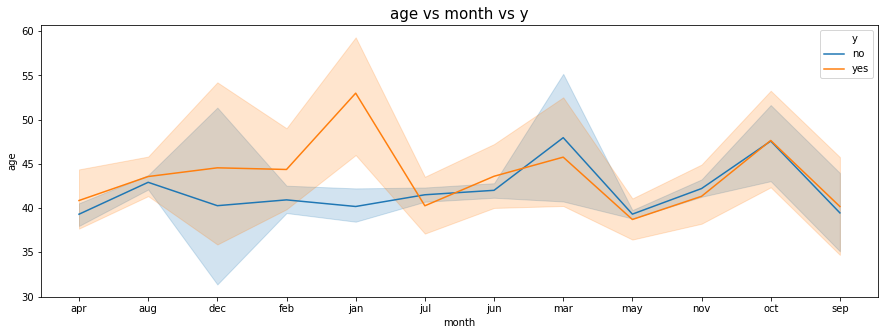

In [141]:
plt.figure(figsize=(15,5))
sns.lineplot(df['month'],df['age'], hue=df['y']);
plt.title('age vs month vs y',size=15);

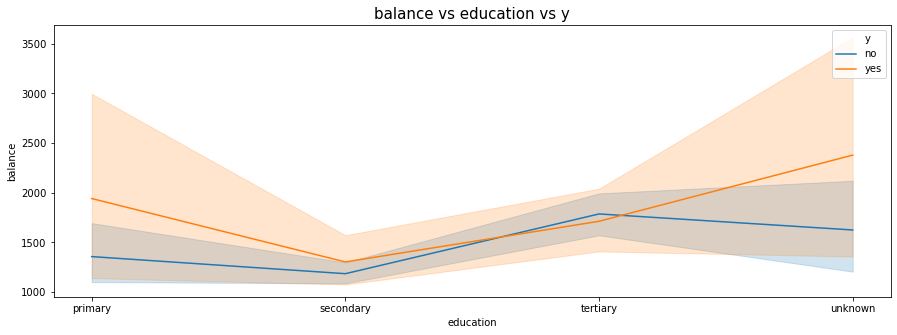

In [137]:
plt.figure(figsize=(15,5))
sns.lineplot(df['education'],df['balance'],hue=df['y']);
plt.title('balance vs education vs y',size=15);

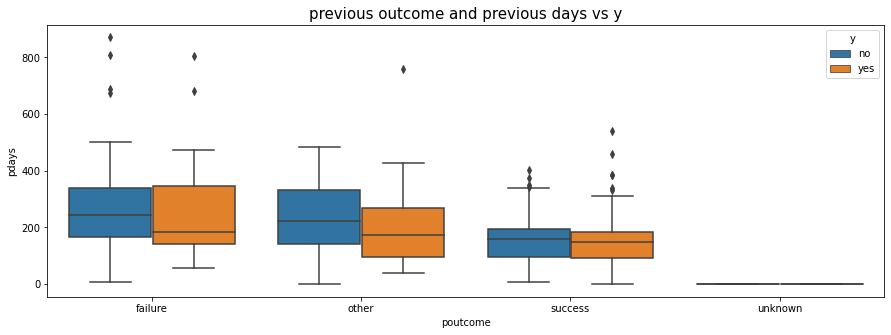

In [135]:
plt.figure(figsize=(15,5))
sns.boxplot(df['poutcome'],df['pdays'],hue=df['y']);
plt.title('previous outcome and previous days vs y',size=15);

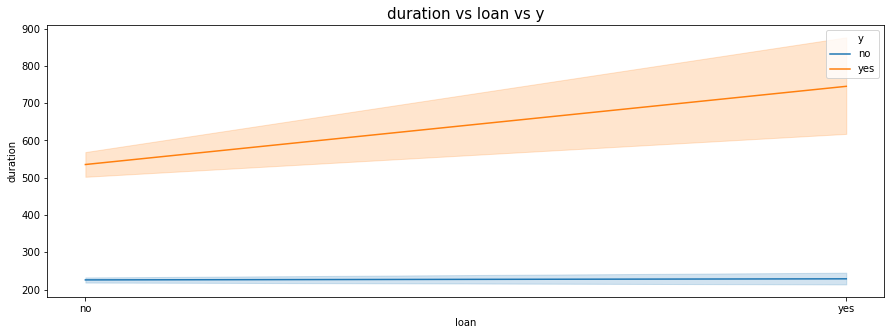

In [133]:
plt.figure(figsize=(15,5))
sns.lineplot(df['loan'],df['duration'],hue=df['y']);
plt.title('duration vs loan vs y',size=15);  

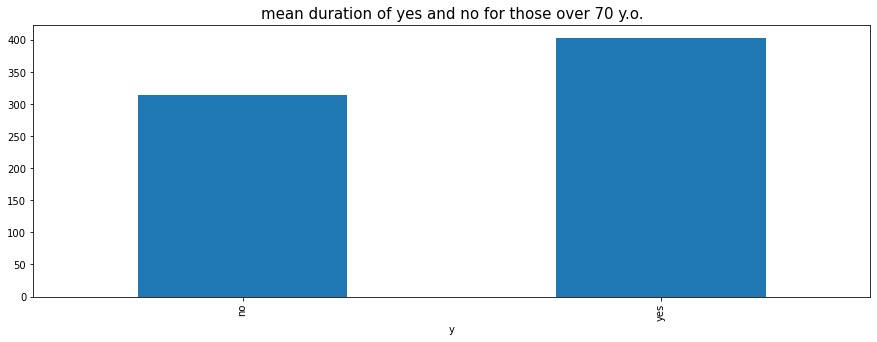

In [117]:
plt.figure(figsize=(15,5))
df.loc[df['age']>70].groupby('y')['duration'].mean().plot.bar();
plt.title('mean duration of yes and no for those over 70 y.o.',size=15);  

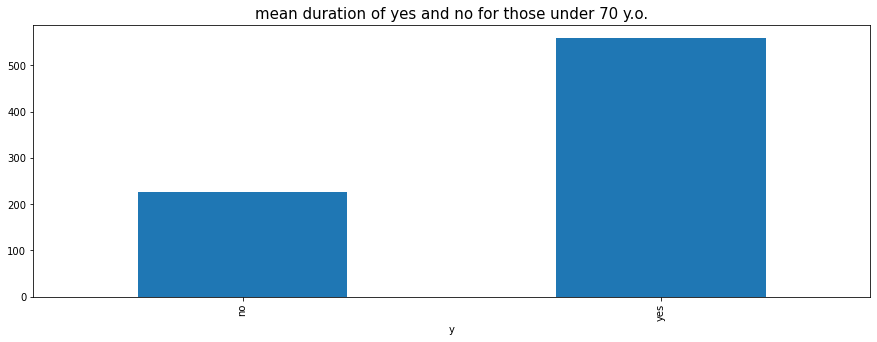

In [118]:
plt.figure(figsize=(15,5))
df.loc[df['age']<70].groupby('y')['duration'].mean().plot.bar();
plt.title('mean duration of yes and no for those under 70 y.o.',size=15);  

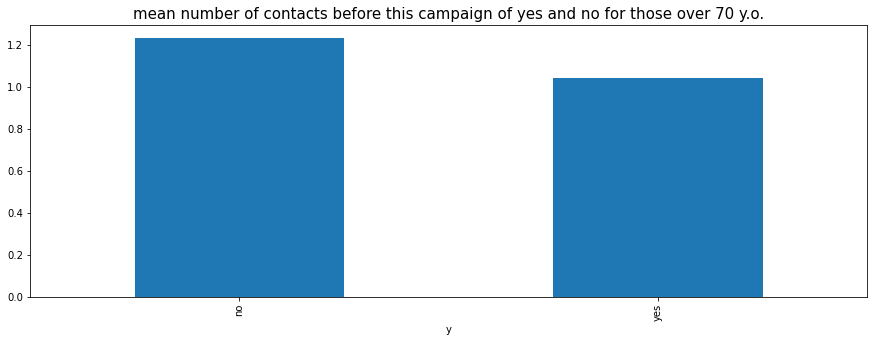

In [120]:
plt.figure(figsize=(15,5))
df.loc[df['age']>70].groupby('y')['previous'].mean().plot.bar();
plt.title('mean number of contacts before this campaign of yes and no for those over 70 y.o.',size=15);

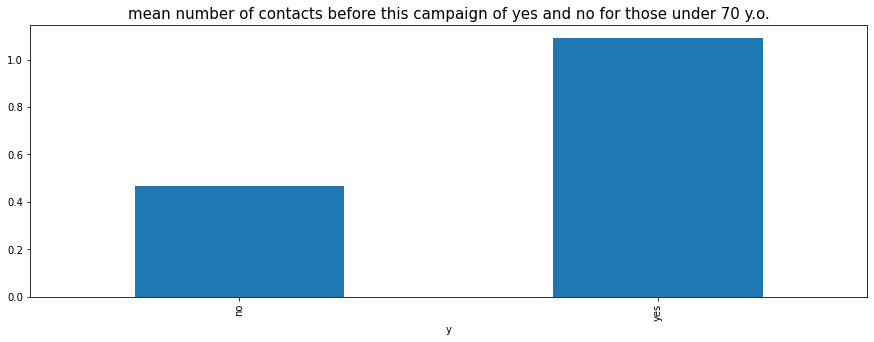

In [122]:
plt.figure(figsize=(15,5))
df.loc[df['age']<70].groupby('y')['previous'].mean().plot.bar();
plt.title('mean number of contacts before this campaign of yes and no for those under 70 y.o.',size=15);

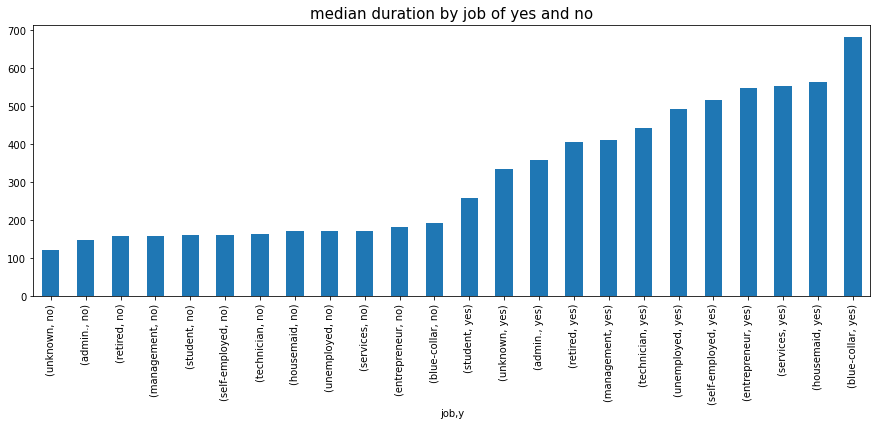

In [124]:
plt.figure(figsize=(15,5))
df.groupby(['job','y'])['duration'].median().sort_values().plot.bar();
plt.title('median duration by job of yes and no',size=15);

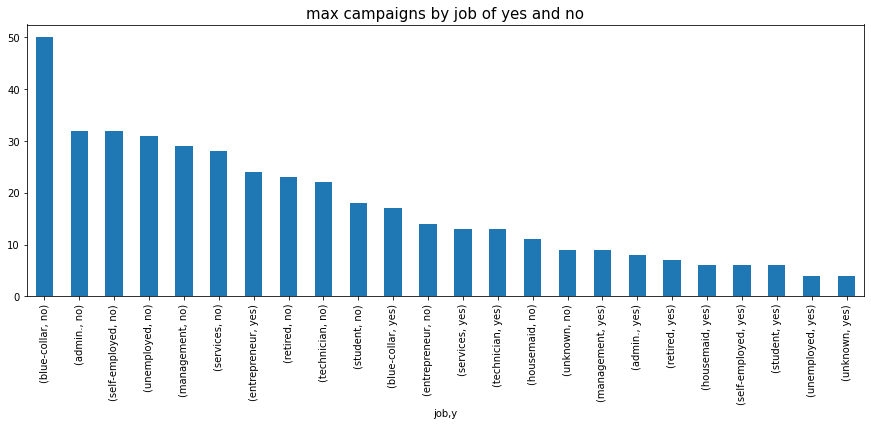

In [128]:
plt.figure(figsize=(15,5))
df.groupby(['job','y'])['campaign'].max().sort_values(ascending=False).plot.bar();
plt.title('max campaigns by job of yes and no',size=15);

In [102]:
df['campaign'].unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

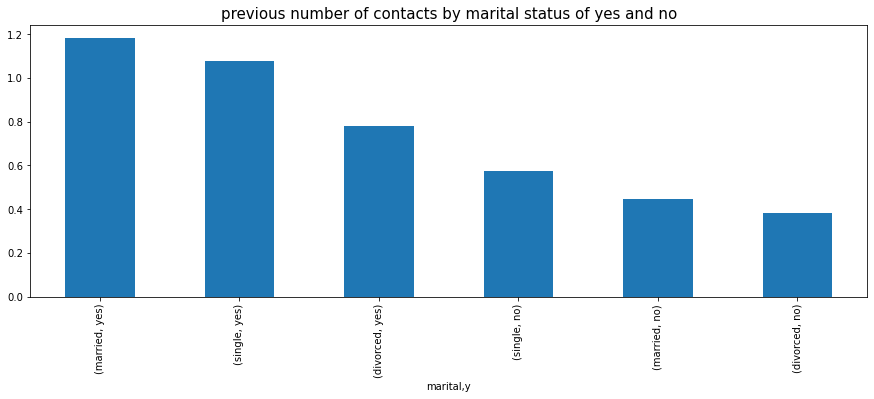

In [132]:
plt.figure(figsize=(15,5))
df.groupby(['marital','y'])['previous'].mean().sort_values(ascending=False).plot.bar();
plt.title('previous number of contacts by marital status of yes and no',size=15);

### Conclusions-Summary
### a)We explored the dataset as a whole and as a part separately for those first time contacted (as some variables refer only to customers that participated in previous campaigns. Another subset could be customers over 70, which have a high acceptance ratio, but these are not many, that is why we did not analyze them more.
### b) We first found the most important positive variables with a correlogram, and then based on this, we examined these positive variables by two and then by three. Results justify this positive correlation, as acceptance rate when variables combined can reach +70% , from around 10%, which is the average for the whole sample.
### c)We solved the uneven acceptance rate by month paradox.
### d) Duration, cellular contact, no housing, no loan, retired job, single (besides of course the variables referring to previous outcome like success and many previous contacts) are the most positive and significant variables.
### e) Business taking : the profile of those with high acceptance ratio is: (i) people with not many obligations(single, no loan, no housing) , (ii) older people,(iii) people that already accepted the product based on similar findings. Approach method: prefer high duration calls, cellular. So, if bank wants to raise acceptance rates, according to findings, should target these three groups with the methods suggested and if they wanted to approach more people with different characteristics probably they could try a different product matching more their needs.